In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [55]:
#imports the csv data
path = "Resources/trip.csv"
#using error_bad_lines=False to skip the inconsistent line (line 50794) in the data provided
bike_trips_df = pd.read_csv(path, error_bad_lines=False)

bike_trips_df.head()

b'Skipping line 50794: expected 12 fields, saw 20\n'


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [56]:
#getting a dataframe of the counts of each gender
groupby_gender = bike_trips_df.groupby("gender")

gender_trips = groupby_gender["trip_id"].count()

#drops the 'other' gender category
gender_trips = gender_trips.drop(gender_trips.index[2])

gender_trips.head()

gender
Female     37562
Male      140564
Name: trip_id, dtype: int64

<IPython.core.display.Javascript object>


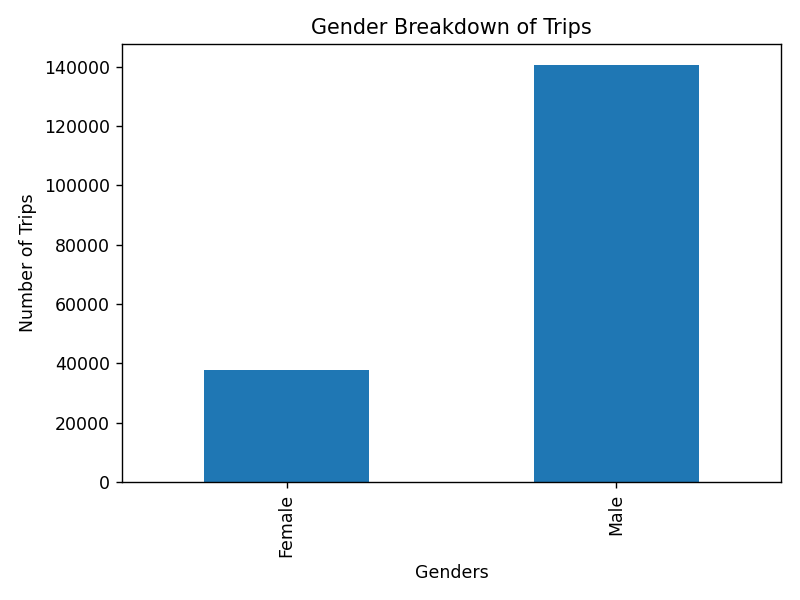

In [61]:
#plotting the dataframe using a bar graph
gender_chart = gender_trips.plot(kind="bar", title="Gender Breakdown of Trips")

gender_chart.set_xlabel("Genders")
gender_chart.set_ylabel("Number of Trips")

plt.tight_layout()
plt.show()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [62]:
#grouping by Bike ID and gender
groupby_bike_gender = bike_trips_df.groupby(["bikeid", "gender"])
bike_duration = groupby_bike_gender["tripduration"].sum()
bike_duration.head()

bikeid    gender
SEA00001  Female    15876.665
          Male      41150.373
          Other       276.880
SEA00005  Female    20616.240
          Male      60386.328
Name: tripduration, dtype: float64

In [63]:
#taking one of the bike IDs and getting the statistics for the bike ride duration
bike_id = "SEA00001"
one_bike_trip = bike_duration.loc[bike_id]
one_bike_trip

gender
Female    15876.665
Male      41150.373
Other       276.880
Name: tripduration, dtype: float64

<IPython.core.display.Javascript object>


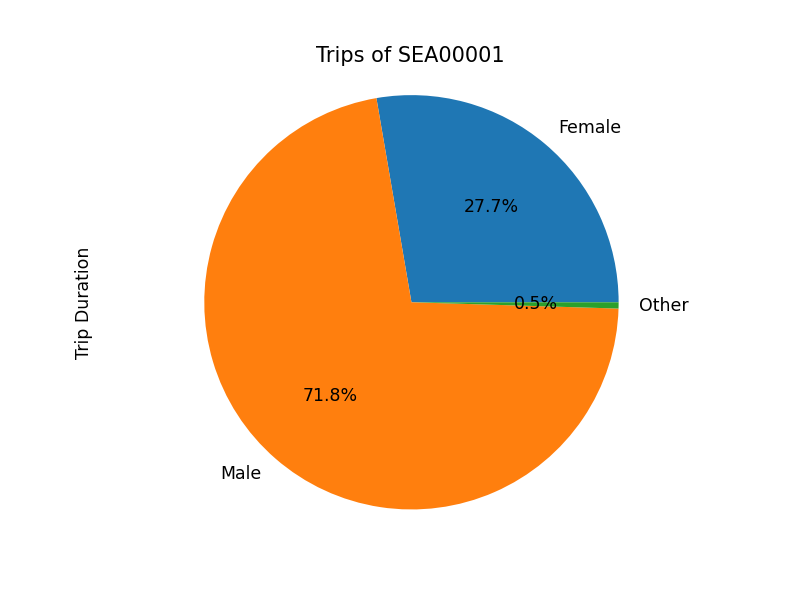

(-1.1147094275724618,
 1.1007004506069709,
 -1.1184745250918073,
 1.1115901234827354)

In [64]:
#plotting the bike duration using a pie chart
bike_duration = one_bike_trip.plot(kind="pie", y="tripduration", title=f"Trips of {bike_id}", autopct="%1.1f%%")
bike_duration.set_ylabel("Trip Duration")

plt.show()
plt.axis("equal")